# Day-10_BreastCancerDetection_VariousMLAlgorithm

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot

# Choose Dataset from local Directory


In [3]:
dataset=pd.read_csv("breastcancerdataset.csv")


In [5]:
print(dataset.shape)
print(dataset.head(5))

(569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  

# Mapping Class string values to numbers

In [7]:
dataset['diagnosis']=dataset['diagnosis'].map({'B':0,'M':1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.2776

# segregate data set into X and y

In [11]:
X =dataset.iloc[:,2:32].values
y=dataset.iloc[:,1].values

    

# Spliting dataset into train Test

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.transform(X_test)

# Training on multiple algorithms

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score,StratifiedKFold





In [43]:
models =[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
print(models)

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()), ('SVM', SVC(gamma='auto'))]


LR : 0.978068
LDA : 0.956087
KNN : 0.964879
CART : 0.927343
NB : 0.949565
SVM : 0.975894


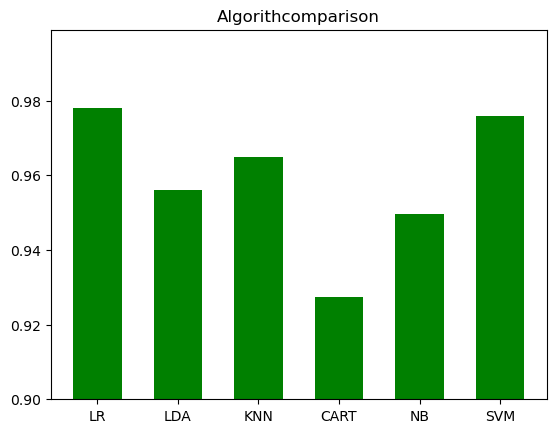

In [45]:
results =[]
names =[]
res=[]
for name,model in models:
    kfold = StratifiedKFold(n_splits =10,random_state=None)
    cv_results =cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s : %f' %(name,cv_results.mean()))

    
pyplot.ylim(.900,.999)

pyplot.bar(names,res,color='green',width =0.6)
pyplot.title('Algorithcomparison')
pyplot.show()

# training & prediction using the algorithm with high accuracy

In [52]:
model1= LogisticRegression(solver='liblinear',multi_class='ovr')
model1.fit(X_train,y_train)
value=[[17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]]
y_pred =model1.predict(value)

print(y_pred)

[1]
